This is the file for the He-Ne laser

In [33]:
# Use laserbeamsize library to extract the beam sizes

import matplotlib.pyplot as plt
import numpy as np
import laserbeamsize as lbs
import imageio.v3 as iio
from scipy.optimize import curve_fit
import matplotlib

In [34]:
test_img = iio.imread("images_labwork_1/60 cm.jpeg")[:,:,0]
print(test_img.shape)

(1200, 1600)


In [35]:

x, y, dx, dy, phi = lbs.beam_size(test_img)
print("The center of the beam ellipse is at (%.0f, %.0f)" % (x, y))
print("The ellipse diameter (closest to horizontal) is %.0f pixels" % dx)
print("The ellipse diameter (closest to   vertical) is %.0f pixels" % dy)
print("The ellipse is rotated %.0f° ccw from the horizontal" % (phi * 180/3.1416))

The center of the beam ellipse is at (727, 270)
The ellipse diameter (closest to horizontal) is 442 pixels
The ellipse diameter (closest to   vertical) is 430 pixels
The ellipse is rotated -27° ccw from the horizontal


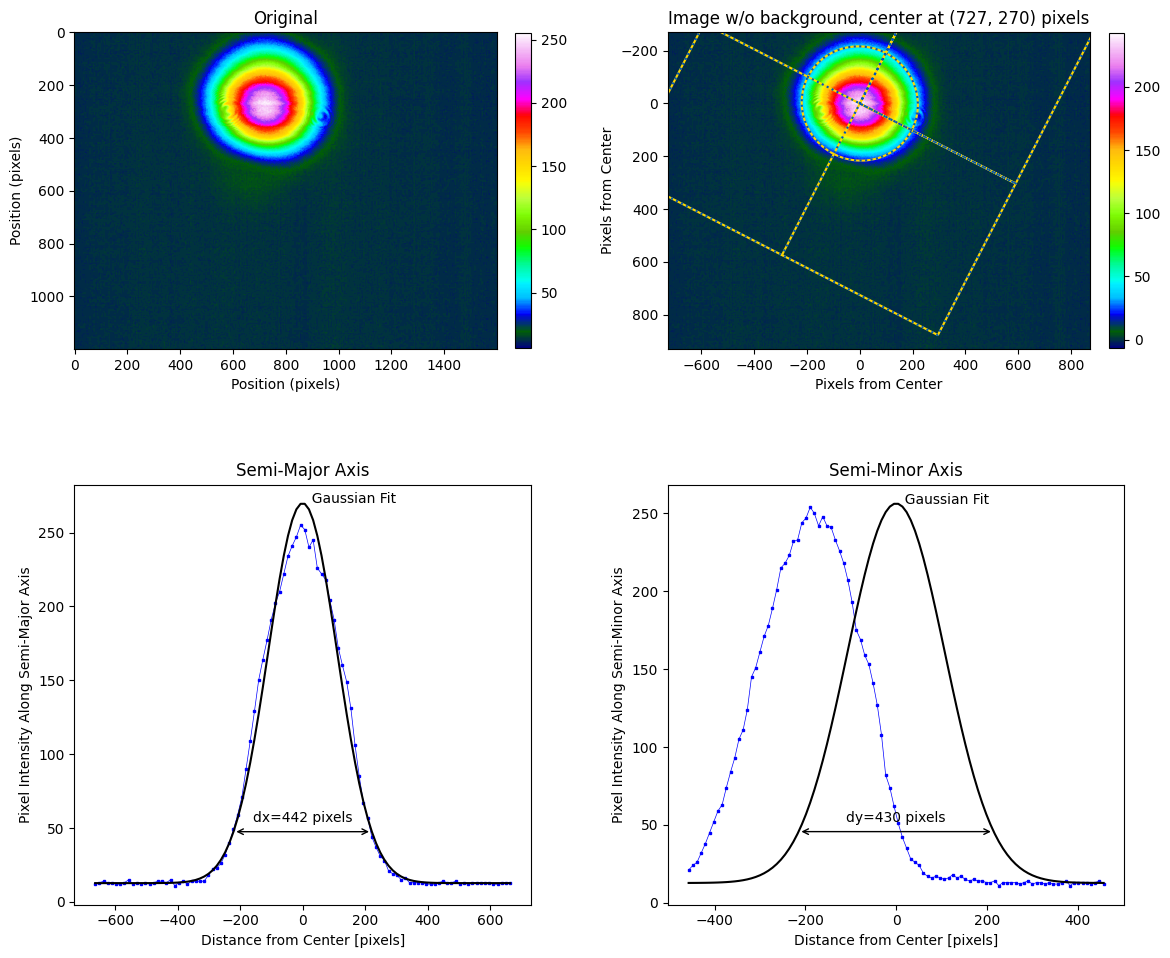

In [36]:
lbs.plot_image_analysis(test_img)
plt.show()

In [37]:
lamb = 632.8e-9 # meters
z = np.array([40, 50, 60, 70, 80])*1e-2 # m
d1 = np.array([373, 404, 442, 468, 509])*2.8e-6 #
d2 = np.array([343, 391, 430, 407, 491])*2.8e-6

In [38]:
print(d1*1e6)

[1044.4 1131.2 1237.6 1310.4 1425.2]


Invalid distribution of measurements for ISO 11146
0 points within 1 Rayleigh distance
0 points greater than 2 Rayleigh distances


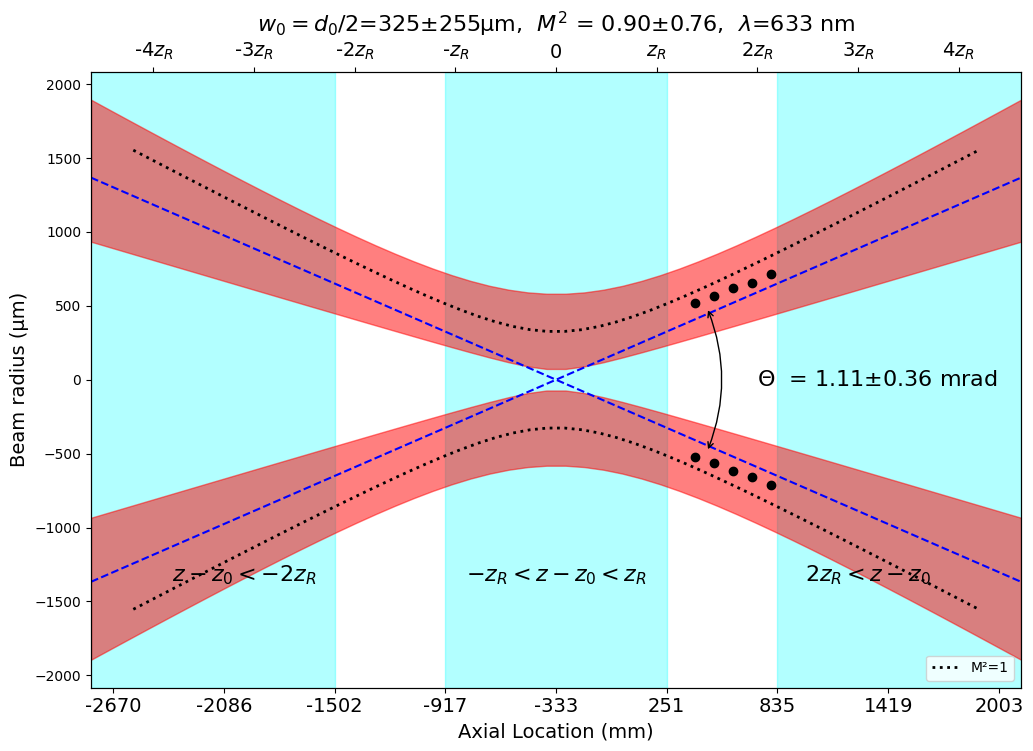

In [39]:
lbs.M2_radius_plot(z, d1, lamb, strict=True)

In [40]:
def radius(z, w0, z0):
    return w0*np.sqrt(1+((z-z0)**2*((632.8e-9)**2))/((np.pi**2)*(w0**4)))

In [41]:
(w0_opt,Z0_opt), res = curve_fit(radius, z, d1/2, maxfev = 10000, bounds = [-1,1], p0 = [1e-6,-0.1])
print(w0_opt*1e6)
print(Z0_opt*100)
print(res)
zR = np.pi*w0_opt**2/(632.8e-9)
print(zR)

349.893515873545
-27.451868757690097
[[ 6.19937776e-11 -8.21792898e-08]
 [-8.21792898e-08  1.31234521e-04]]
0.6077922959264878


In [42]:
z_array = np.linspace(Z0_opt-3*zR,Z0_opt+3*zR,1000)

In [43]:
w0_opt/zR

0.000575679419134764

Text(0.5, 0.98, '$w_0 = 349.89 \\,\\mu$m, $\\lambda$ = 632.8 nm')

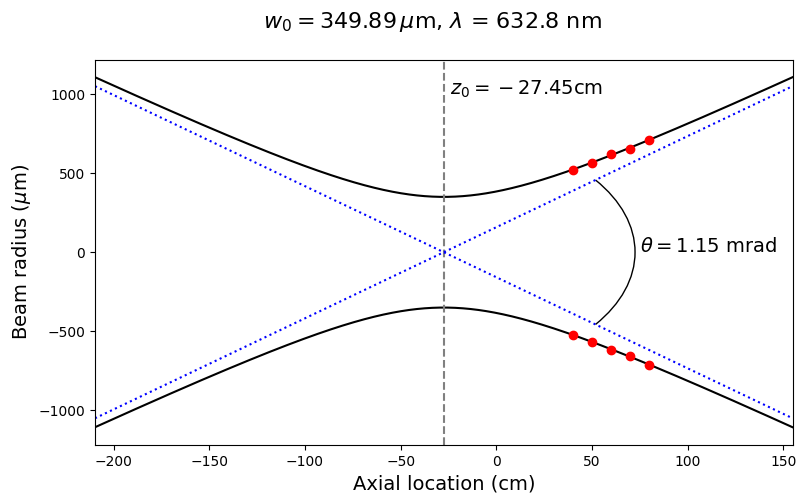

In [44]:
fig, ax = plt.subplots(1,1, figsize = (9,5))
ax.plot(z_array*100, radius(z_array, w0_opt, Z0_opt)*1e6, color = 'black', zorder = 0)
ax.plot(z_array*100, -radius(z_array, w0_opt, Z0_opt)*1e6, color = 'black', zorder = 0)
ax.scatter(z*100, (d1/2)*1e6, color = 'red', zorder = 1)
ax.scatter(z*100, -(d1/2)*1e6, color = 'red', zorder = 1)
ax.grid(False)
ax.set_xlim([np.min(z_array*100), np.max(z_array*100)])
ax.set_xlabel('Axial location (cm)', fontsize = 14)
ax.set_ylabel('Beam radius ($\mu$m)', fontsize = 14)
ax.axvline(Z0_opt*100, linestyle = '--', color = 'grey')
ax.axline((Z0_opt*100, 0), slope = w0_opt*1e6/(zR*100), color = 'blue', linestyle = 'dotted')
ax.axline((Z0_opt*100, 0), slope = -w0_opt*1e6/(zR*100), color = 'blue', linestyle = 'dotted')
ax.text(Z0_opt*100+3, 1000, f'$z_0 = {Z0_opt*100:.2f}$cm', fontsize = 14)
ax.add_patch(matplotlib.patches.Arc((Z0_opt*100, 0), width = 200, height = 1500, theta1 = (180/np.pi)*np.arctan2(-w0_opt*1e6,(zR*100)), theta2 = (180/np.pi)*np.arctan2(w0_opt*1e6,(zR*100))))
ax.text(75, 0, f'$\\theta= {(np.arctan2(w0_opt,(zR))-np.arctan2(-w0_opt,(zR)))*1000:.2f}$ mrad', fontsize = 14)
fig.suptitle(f"$w_0 = {w0_opt*1e6:.2f} \,\mu$m, $\lambda$ = 632.8 nm", fontsize = 16)

In [45]:
cav_length = np.array([29, 34, 39, 44, 54, 64, 74, 89, 104])
power_arr = np.array([165, 170, 169, 166, 175, 175, 167, 160, 45])

(0.0, 120.0)

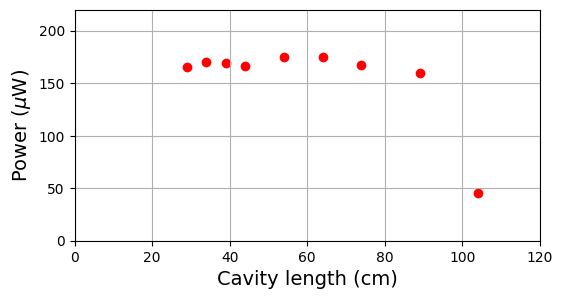

In [46]:
fig_pwr, ax_pwr = plt.subplots(1,1, figsize = (6,3))
ax_pwr.scatter(cav_length, power_arr, color = 'red')
ax_pwr.grid(True)
ax_pwr.set_xlabel("Cavity length (cm)", fontsize = 14)
ax_pwr.set_ylabel("Power ($\mu$W)", fontsize = 14)
ax_pwr.set_ylim([0,220])
ax_pwr.set_xlim([0,120])